# Usage of the `calcimetry` module

This is a high level (low code) API in python to request information stored in the database

In [1]:
from calcimetry.mongo_api import MongoInfo
from calcimetry.config import Config

# parameters where the database is stored, can obviously be distant.
Config.load_from_dict(
    {
        "mongo": {
            "host": "localhost",
            "port": 27017
        }
    }
)


### Retrieves all drill names

In [2]:
from calcimetry.calcimetry_api import CalcimetryAPI

with CalcimetryAPI() as calcimetry_api:
    print(calcimetry_api.get_drill_names())

    # but maybe this makes sense
    print(calcimetry_api.get_drill_list())

{'MCO3001', 'OHZ2003', 'KEY1005', 'MAG3003', 'OHZ2026', 'PGZ1022', 'SUG1102', 'TER1302', 'OHZ5001', 'DPC3024', 'SUG1107', 'SUG1301', 'REP2209', 'TPV1321', 'DCN2006', 'GGD4024', 'IBE2001', 'REP2302', 'OHZ3005', 'SUG1202', 'REP2206', 'SUG1203', 'SDZ1256', 'SDZ1290', 'OHZ7006', 'SDZ1257', 'FRO1001', 'NIH2011', 'MCC1701', 'KEY1002', 'FOR1002', 'PAC1002', 'OHZ7008', 'OHZ1842', 'OHZ6128', 'SUG2020', 'SDZ1291', 'BPE4024', 'NIH2012', 'GGD4023', 'OHZ5310', 'GIS1001', 'OHZ2021', 'REP2104', 'MAG3002', 'PEP1001', 'PEP2002', 'OHZ2007', 'KEY1205', 'DCN2003', 'MAG3001', 'OHZ1844', 'OHZ2029', 'SUG2101', 'KEY1006', 'KEY1001', 'SUG2102', 'KEY1206', 'OHZ5303', 'OHZ6562', 'IBE2002', 'DPC3022', 'OHZ3004', 'OHZ2024', 'OHZ6561', 'NSC1413', 'OHZ2025', 'OHZ2009', 'NSC1414', 'OHZ1845', 'SUG1118', 'OHZ2027', 'OHZ1304', 'TPV1322', 'IBE2003', 'DIR2002', 'OHZ2022', 'DIR2003', 'SDZ1285', 'OHZ7101', 'PAC1001', 'NSC1412', 'OHZ7102', 'IBE2004', 'DIR1002', 'OHZ1841', 'REP2301', 'OHZ1705', 'OHZ2004', 'OHZ6564', 'OHZ2006'

### Retrieves image ids for one drillname
 

In [3]:
drillname="IBE2003"
with CalcimetryAPI() as calcimetry_api:
    print(calcimetry_api.get_images_id(drillname))

[580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669]


### Retrieve one image and its description from its id

{'ImageId': 2123, 'FileName': 'GTR2005-01_0004_REP2206_1100_1205.jpg', 'DrillName': 'REP2206', 'Cote0': 1100, 'Cote1': 1205, 'PxSize': 1600, 'PySize': 342, 'px0': 6, 'px1': 1587, 'k_Up': [[651, 63], [1144, 76], [1583, 79]], 'k_Down': [[645, 187], [896, 194], [1207, 200], [1591, 211]], 'k_Arrow': [[649, 112], [1055, 124], [1357, 131], [1574, 142]], 'criteria': {'n_measurements': 1, 'resolution': 0.06641366223908918, 'y_ratio': 0.3684210526315789, 'focus': 378.73707388568477, 'gradient': {'min': 0.0, 'max': 825.0006060603835, 'ave': 54.45850055493534, 'std': 88.21767529311215}, 'colours': [[49.35492326480626, 46.055010830472696, 34.13945409716469], [149.8866255478013, 116.12263972298986, 85.41627441432534], [225.19175079517322, 205.6489143963276, 194.94005670037245]], 'brisque': 28.17889404296875}}
0.06641366223908918
(1600, 342) (3036, 648) 0.035
# of measurements for this img: 1


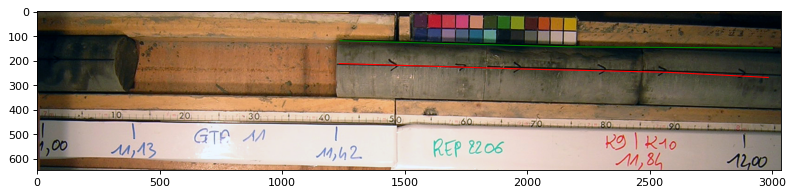

In [4]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches
from calcimetry.carrot_img import CarrotImage
from calcimetry.polyline import Polyline
IMG_ID = 2123


def draw_line(polyline: Polyline, color='red'):
    x = []
    y = []
    for t in iter(polyline):
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch


with CalcimetryAPI() as calcimetry_api:
    print(calcimetry_api.read_image_info(IMG_ID)) # database info 

    img = calcimetry_api.read_image(IMG_ID)
    print(img.resolution)

    zoomed_img = img.to_resolution(0.035)
    print(img.jpg.size, zoomed_img.jpg.size, zoomed_img.resolution)
    plt.figure(figsize=(12, 8), dpi=80)
    plt.imshow(zoomed_img.jpg)
    if not zoomed_img.k_arrow.empty:
        arrow_line = draw_line(zoomed_img.k_arrow)
        plt.gca().add_patch(arrow_line)
        arrow_line = draw_line(zoomed_img.k_up, color='green')
        plt.gca().add_patch(arrow_line)

  
    # CarrotImage infos
    print(f"# of measurements for this img: {img.n_measurements}")


### Select one part of the image at one measurement location


In [5]:
from calcimetry.measurement import Measurement

idx_measure = 0
measure = img.measurements[idx_measure]

# display some information of the measurement
print(measure)



Measure: #3216 (image 2123): (1142->32) quality:10


Text(0.5, 0, 'val1m: 32')

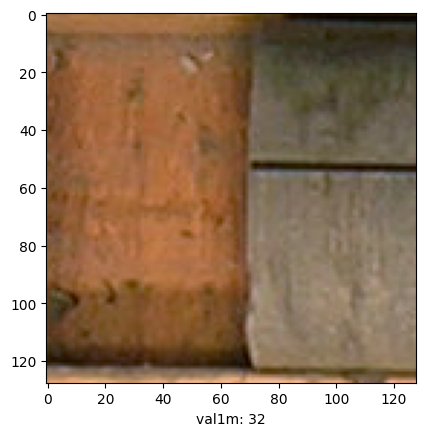

In [7]:
dim = 128
center = (
    img.p_x(measure.cote), # get for this picture the position in pixel from this measure, shift of half of the size
    img.k_arrow.p_y(measure.cote)# get on k_arrow line the position in pixel from this measure
    )
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    vignette = calcimetry_api.read_vignette(IMG_ID, center, dim=dim)
plt.imshow(vignette)
plt.xlabel(f"val1m: {measure.val_1m}")


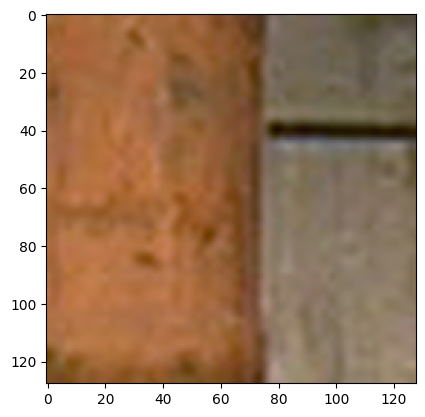

In [6]:
dim = 128
center = (
    zoomed_img.p_x(measure.cote), # get for this picture the position in pixel from this measure, shift of half of the size
    zoomed_img.k_arrow.p_y(measure.cote) # get on k_arrow line the position in pixel from this measure
    )
vignette = zoomed_img.vignette(dim=dim, center=center)
plt.imshow(vignette)

### Retrieves images infos as a pandas dataframe

In [7]:
import pandas as pd
with CalcimetryAPI() as calcimetry_api:
    df = calcimetry_api.get_images_df()
    print(df.head())

   ImageId                               FileName DrillName  Cote0  Cote1  \
0        0  GTR2012-07_0023_BPE4023_0000_0110.jpg   BPE4023      0    110   
1        1  GTR2012-07_0023_BPE4023_0090_0200.jpg   BPE4023     90    200   
2        2  GTR2012-07_0023_BPE4023_0180_0290.jpg   BPE4023    180    290   
3        3  GTR2012-07_0023_BPE4023_0270_0380.jpg   BPE4023    270    380   
4        4  GTR2012-07_0023_BPE4023_0350_0440.jpg   BPE4023    350    440   

   PxSize  PySize    px0     px1  \
0    3231     625   28.0  3137.0   
1    3456     630  172.0  3311.0   
2    3456     630  135.0  3273.0   
3    3456     636   97.0  3224.0   
4    2824     640    2.0  2574.0   

                                                k_Up  \
0  [[55, 173], [259, 179], [430, 177], [583, 171]...   
1  [[11, 187], [556, 189], [1081, 190], [1590, 18...   
2  [[8, 166], [388, 171], [1155, 177], [2061, 184...   
3  [[5, 181], [811, 182], [1253, 190], [2597, 199...   
4  [[6, 185], [186, 187], [524, 180], [1